<a href="https://colab.research.google.com/github/lvisdd/object_detection_tutorial/blob/master/keras_mobilenet_ssd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# restart (or reset) your virtual machine
#!kill -9 -1

# [Keras Implemention of CustomNetwork-SSD](https://github.com/tanakataiki/ssd_kerasV2)

In [2]:
!git clone https://github.com/tanakataiki/ssd_kerasV2.git

Cloning into 'ssd_kerasV2'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 176 (delta 4), reused 21 (delta 2), pack-reused 153
Receiving objects: 100% (176/176), 50.99 MiB | 10.86 MiB/s, done.
Resolving deltas: 100% (78/78), done.


In [3]:
%cd ssd_kerasV2

/content/ssd_kerasV2


In [4]:
!perl -pi.bak -e "s|K.image_dim_ordering\(\) == 'tf'|K.image_data_format\(\) == 'channels_last'|g" /content/ssd_kerasV2/ssd_layers.py
!diff /content/ssd_kerasV2/ssd_layers.py.bak /content/ssd_kerasV2/ssd_layers.py

32c32
<         if K.image_dim_ordering() == 'tf':
---
>         if K.image_data_format() == 'channels_last':
84c84
<         if K.image_dim_ordering() == 'tf':
---
>         if K.image_data_format() == 'channels_last':


In [5]:
%cd /content/ssd_kerasV2
%env PYTHONPATH=/env/python:/content/ssd_kerasV2:/content/ssd_kerasV2/model
%env

/content/ssd_kerasV2
env: PYTHONPATH=/env/python:/content/ssd_kerasV2:/content/ssd_kerasV2/model


{'CLICOLOR': '1',
 'CLOUDSDK_CONFIG': '/content/.config',
 'COLAB_GPU': '1',
 'CUDA_PKG_VERSION': '10-0=10.0.130-1',
 'CUDA_VERSION': '10.0.130',
 'CUDNN_VERSION': '7.6.3.30',
 'DATALAB_SETTINGS_OVERRIDES': '{"kernelManagerProxyPort":6000,"kernelManagerProxyHost":"172.28.0.3","jupyterArgs":["--ip=\\"172.28.0.2\\""]}',
 'DEBIAN_FRONTEND': 'noninteractive',
 'ENV': '/root/.bashrc',
 'GCS_READ_CACHE_BLOCK_SIZE_MB': '16',
 'GIT_PAGER': 'cat',
 'GLIBCPP_FORCE_NEW': '1',
 'GLIBCXX_FORCE_NEW': '1',
 'HOME': '/root',
 'HOSTNAME': 'd2c1a39dd437',
 'JPY_PARENT_PID': '16',
 'LANG': 'en_US.UTF-8',
 'LAST_FORCED_REBUILD': '20190507',
 'LD_LIBRARY_PATH': '/usr/lib64-nvidia',
 'LD_PRELOAD': '/usr/lib/x86_64-linux-gnu/libtcmalloc.so.4',
 'LIBRARY_PATH': '/usr/local/cuda/lib64/stubs',
 'MPLBACKEND': 'module://ipykernel.pylab.backend_inline',
 'NCCL_VERSION': '2.4.8',
 'NO_GCE_CHECK': 'True',
 'NVIDIA_DRIVER_CAPABILITIES': 'compute,utility',
 'NVIDIA_REQUIRE_CUDA': 'cuda>=10.0 brand=tesla,driver>=384,dr

In [6]:
import cv2
import keras
from keras.applications.imagenet_utils import preprocess_input
from keras.backend.tensorflow_backend import set_session
from keras.models import Model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
# from scipy.misc import imread
from imageio import imread, imsave
from PIL import Image
import tensorflow as tf

import sys

from model.ssd300MobileNet import SSD
from ssd_utils import BBoxUtility

# %matplotlib inline
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['image.interpolation'] = 'nearest'

np.set_printoptions(suppress=True)

config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.45
set_session(tf.Session(config=config))

Using TensorFlow backend.


In [0]:
voc_classes = ['Aeroplane', 'Bicycle', 'Bird', 'Boat', 'Bottle',
               'Bus', 'Car', 'Cat', 'Chair', 'Cow', 'Diningtable',
               'Dog', 'Horse','Motorbike', 'Person', 'Pottedplant',
               'Sheep', 'Sofa', 'Train', 'Tvmonitor']
NUM_CLASSES = len(voc_classes) + 1

In [8]:
%%bash
curl -sc /tmp/cookie "https://doc-14-34-docs.googleusercontent.com/docs/securesc/5dprgvmlk9hgqo5aled8395csv4placs/20r9biao3tcn339lhc0qr2nu5ksoscpk/1568023200000/12524521688469662174/00762216661472344569/1qnRNrmS3pe7tojCHjrRGo4i93XGGv6Vk?e=download" > /dev/null
export CODE="$(awk '/_warning_/ {print $NF}' /tmp/cookie)"
curl -Lb /tmp/cookie "https://drive.google.com/uc?export=download&confirm=${CODE}&id=1qnRNrmS3pe7tojCHjrRGo4i93XGGv6Vk" -o MobileNetSSD300weights_voc_2007_class20.hdf5

awk: cannot open /tmp/cookie (No such file or directory)
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   388    0   388    0     0    144      0 --:--:--  0:00:02 --:--:--   144
100 27.4M    0 27.4M    0     0  8597k      0 --:--:--  0:00:03 --:--:-- 8597k


In [9]:
input_shape=(300, 300, 3)
model = SSD(input_shape, num_classes=NUM_CLASSES)
# model.load_weights('./MobileNetSSD300weights_voc_2007.hdf5', by_name=True)
# model.load_weights('./MobileNetSSD300weights_voc_2007_class20.hdf5', by_name=True)
model.load_weights('./MobileNetSSD300weights_voc_2007_class20.hdf5', by_name=False)
bbox_util = BBoxUtility(NUM_CLASSES)







17227776/17225924 [==============================] - 2s 0us/step


In [10]:
#!wget https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/test_images/image1.jpg
#!wget https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/test_images/image2.jpg
!wget https://raw.githubusercontent.com/tensorflow/tensorflow/master/tensorflow/examples/label_image/data/grace_hopper.jpg

--2019-09-10 16:08:24--  https://raw.githubusercontent.com/tensorflow/tensorflow/master/tensorflow/examples/label_image/data/grace_hopper.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61306 (60K) [image/jpeg]
Saving to: ‘grace_hopper.jpg’

grace_hopper.jpg    100%[===================>]  59.87K  --.-KB/s    in 0.02s   

2019-09-10 16:08:24 (2.35 MB/s) - ‘grace_hopper.jpg’ saved [61306/61306]



In [0]:
inputs = []
images = []
# img_path = './pics/picture_name.jpg'
# img = image.load_img(img_path, target_size=(300, 300))
# img = image.img_to_array(img)
# images.append(imread(img_path))
# inputs.append(img.copy())
# inputs = preprocess_input(np.array(inputs))
#img_path = './image1.jpg'
#img_path = './image2.jpg'
img_path = './grace_hopper.jpg'
img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img)
images.append(np.asarray(Image.open(img_path)))
inputs.append(img.copy())
inputs = preprocess_input(np.array(inputs))

In [12]:
preds = model.predict(inputs, batch_size=1, verbose=1)

1/1 [==============================] - 2s 2s/step


In [0]:
results = bbox_util.detection_out(preds)

In [14]:
%%time
a = model.predict(inputs, batch_size=1)
b = bbox_util.detection_out(preds)

CPU times: user 21 ms, sys: 890 µs, total: 21.9 ms
Wall time: 23.3 ms


In [0]:
# This is needed to display the images.
%matplotlib inline

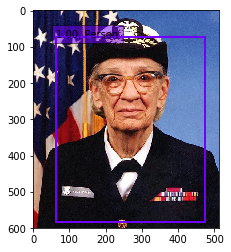

In [16]:
for i, img in enumerate(images):
    # Parse the outputs.
    det_label = results[i][:, 0]
    det_conf = results[i][:, 1]
    det_xmin = results[i][:, 2]
    det_ymin = results[i][:, 3]
    det_xmax = results[i][:, 4]
    det_ymax = results[i][:, 5]

    # Get detections with confidence higher than 0.6.
    top_indices = [i for i, conf in enumerate(det_conf) if conf >= 0.6]

    top_conf = det_conf[top_indices]
    top_label_indices = det_label[top_indices].tolist()
    top_xmin = det_xmin[top_indices]
    top_ymin = det_ymin[top_indices]
    top_xmax = det_xmax[top_indices]
    top_ymax = det_ymax[top_indices]

    colors = plt.cm.hsv(np.linspace(0, 1, 21)).tolist()

    plt.imshow(img / 255.)
    currentAxis = plt.gca()

    for i in range(top_conf.shape[0]):
        xmin = int(round(top_xmin[i] * img.shape[1]))
        ymin = int(round(top_ymin[i] * img.shape[0]))
        xmax = int(round(top_xmax[i] * img.shape[1]))
        ymax = int(round(top_ymax[i] * img.shape[0]))
        score = top_conf[i]
        label = int(top_label_indices[i])
        label_name = voc_classes[label - 1]
        display_txt = '{:0.2f}, {}'.format(score, label_name)
        coords = (xmin, ymin), xmax-xmin+1, ymax-ymin+1
        color = colors[label]
        currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
        currentAxis.text(xmin, ymin, display_txt, bbox={'facecolor':color, 'alpha':0.5})
    
    plt.show()